
A time-series meet the criterion of **Weak Stationarity** if $
E[X_t] = C$, $ {Var}(X_t)= B$ and $\text{Cov}(X_t, X_{t+h})$ depends only on lag h,  not on t where C and B is constant. There are multiple ways to make a non-stationary time series stationary. The simplest way is **differencing** which removes the trend component and stabilize the variance. Either way, to check for the stationarity of the data, **Augmented Dickey-Fuller test** is utilized. We will be carrying this out before applying our models.


We implement the following models for time-series:
1. MA: Assumes Stationarity
2. AR: Assumes Stationarity
3. ARMA: Assumes Stationarity
4. ARIMA: Does not assume stationarity
5. ARIMAX: Does not assume stationarity





### Brief Introduction to the models


1. **The autoregressive model** of order p, denoted as AR(p), can be expressed as follows:

   $$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t$$
   
   Where $X_t$ is the value of the time series at time t, $c$ is a constant or intercept term, $ϕ_1,ϕ_2  ,….,ϕ_p$ are the autoregressive parameters, $X_{t-1},X_{t-2}  ,…,X_{t-p}$ are the past values of the time series and $ε_t$ is the error term or white noise at time
2. The general form of a Moving Average model of order q, denoted as MA(q), is expressed as follows:
$$ X_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_p \varepsilon_{t-q} $$

3. **ARMA model**:  Combines both autoregressive (AR) and moving average (MA) components. It is specified by two parameters: p (the order of the autoregressive component) and q (the order of the moving average component). Therefore, we obtain:
$$ X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \ldots + \phi_p X_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_p \varepsilon_{t-q} $$

4. **ARIMA**: Combines autoregression (AR), differencing (I), and moving average (MA) components. The main novelty is ofcourse the integrated component (I). This component involves differencing the time series data to make it stationary.
5. **ARIMAX**: When we incorporate other regressor variables along with autoregressors and moving averages in a time series model, we obtain ARIMAX. Essentially, the new part are the Exogenous (X) Variables which are external variables that are not part of the time series but may influence it. These can be added to the model as additional regressors.


### Explaination Autocorrelation & ACF plots

- The autocorrelation coefficient ranges from -1 to 1. The ACF plot displays the correlation coefficients between the observations at different lags. The x-axis of the ACF plot represents the lagged values of the past observations. The y-axis represents the correlation coefficient between the current observation and the observation at a specific lag.

  For a stationary time series, the ACF should decay rapidly to zero as the lag increases. If the ACF values decrease slowly or oscillate, it may indicate non-stationarity. Seasonal patterns in a time series may result in periodic spikes in the ACF plot




# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA


from sklearn.linear_model import LinearRegression


from scipy.stats import boxcox

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_path = "/content/drive/My Drive/Datasets/Panama_Dataset/train_dataframes.xlsx"
test_path = "/content/drive/My Drive/Datasets/Panama_Dataset/test_dataframes.xlsx"


In [ ]:
train_dict = pd.read_excel(open(train_path, 'rb'), sheet_name=None, index_col=0)
test_dict = pd.read_excel(open(test_path, 'rb'), sheet_name=None, index_col=0)

# For a single train-test split

In [ ]:

keys = list(train_dict.keys())
print(keys)
train = train_dict[keys[0]]
test = test_dict[keys[0]]

#print(train.head(5))
#print(len(train)) #we should obtain 36721
#print(len(test)) # we should obtain 168

['Week 15, Apr 2019', 'Week 21, May 2019', 'Week 24, Jun 2019', 'Week 29, Jul 2019', 'Week 33, Aug 2019', 'Week 37, Sep 2019', 'Week 41, Oct 2019', 'Week 44, Nov 2019', 'Week 51, Dec 2019', 'Week 01, Jan 2020', 'Week 06, Feb 2020', 'Week 10, Mar 2020', 'Week 20, May 2020', 'Week 24, Jun 2020']


<ipython-input-8-9acbedb2f0ef>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand_train = demand_train.resample('M').sum()


1531
220
52


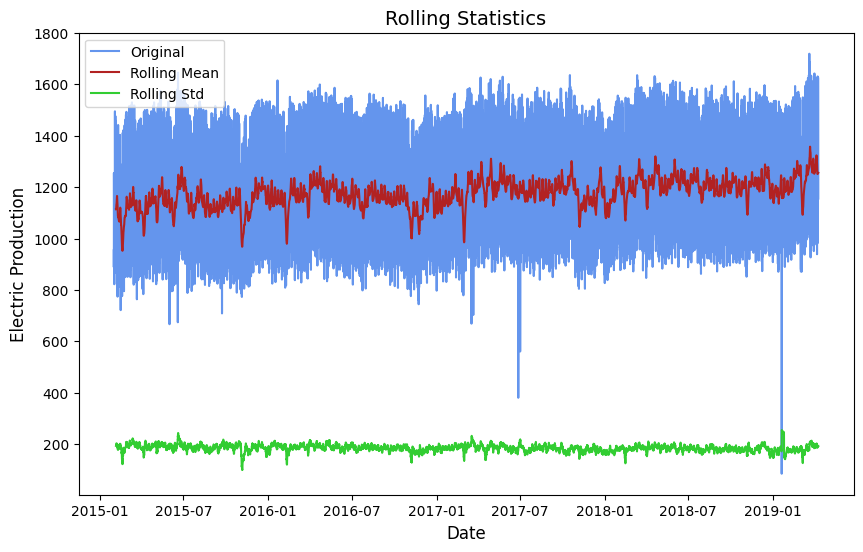

In [ ]:
demand_train = train[['DEMAND']]
demand_test = test[["DEMAND"]]

daily_demand_train = demand_train.resample('D').sum()
weekly_demand_train = demand_train.resample('W').sum()
monthly_demand_train = demand_train.resample('M').sum()

print(len(daily_demand_train))
print(len(weekly_demand_train))
print(len(monthly_demand_train))

rolling_mean = demand_train.rolling(window=120).mean()
rolling_std = demand_train.rolling(window=120).std()

plt.figure(figsize = (10,6))
plt.plot(demand_train, color='cornflowerblue', label='Original')
plt.plot(rolling_mean, color='firebrick', label='Rolling Mean')
plt.plot(rolling_std, color='limegreen', label='Rolling Std')
plt.xlabel('Date', size = 12)
plt.ylabel('Electric Production', size  = 12)
plt.legend(loc = 'upper left')
plt.title('Rolling Statistics', size = 14)
plt.show()

The ACF plot shows a clear sinusoidal. This suggests that the time series has a periodic component over the year.

The PACF plot has strong lags at the beginning and then diminishes, suggesting an autoregressive (AR) structure.

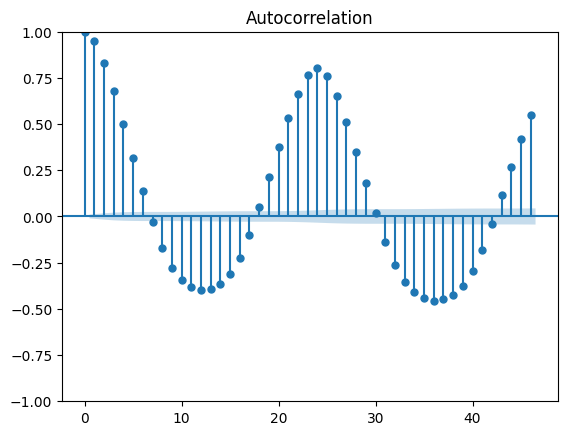

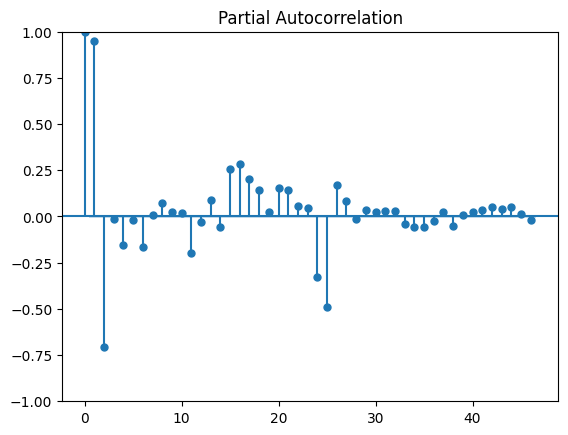

In [ ]:
acf_original = plot_acf(demand_train)
pacf_origina = plot_pacf(demand_train)


In the daily demand, the ACF plot still shows periodicity. This is in line with the data exploration where we saw how the demand peaks at 12 pm and then diminishes.


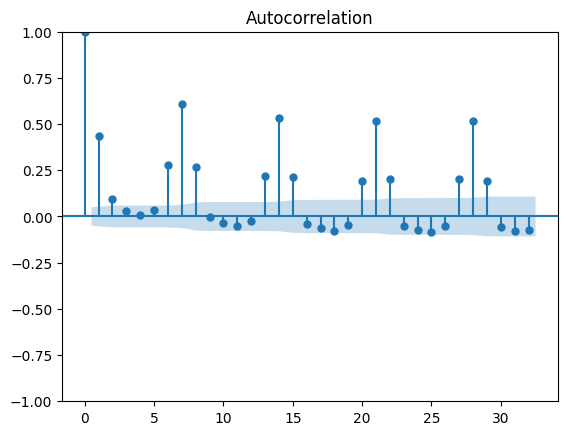

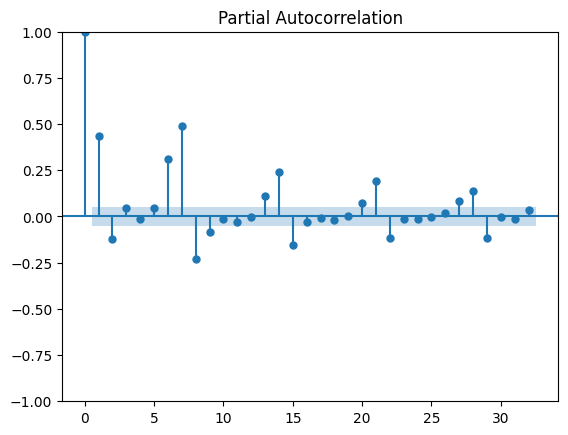

In [ ]:
acf_original = plot_acf(daily_demand_train)
pacf_origina = plot_pacf(daily_demand_train)


The weekly demand does not show any pronounced autocorrelation. This is because on average, the demand remains constant from week to week (although it does go down a bit in weekdays). Either way, this is all in accordance with insights from data exploration.

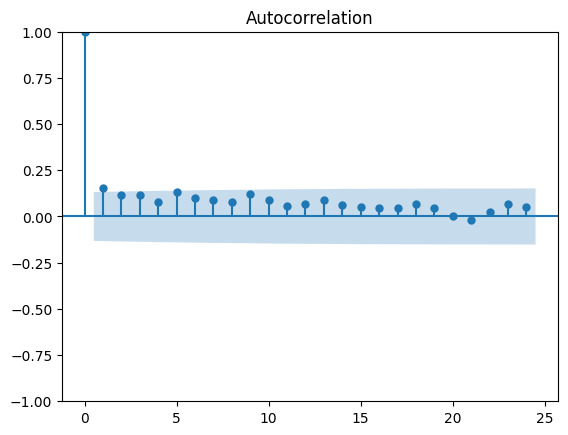

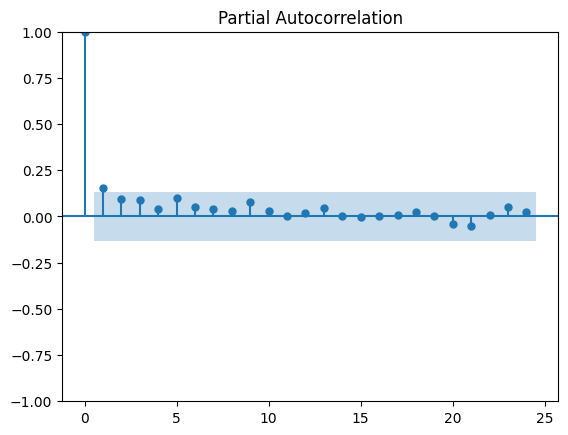

In [ ]:
acf_original = plot_acf(weekly_demand_train)
pacf_origina = plot_pacf(weekly_demand_train)

### Trend-Seasonality Decomposition

We use statsmodels.tsa.seasonal to perform this decomposition. These decompositions were performed in data-exploration also.

Demand across all the months


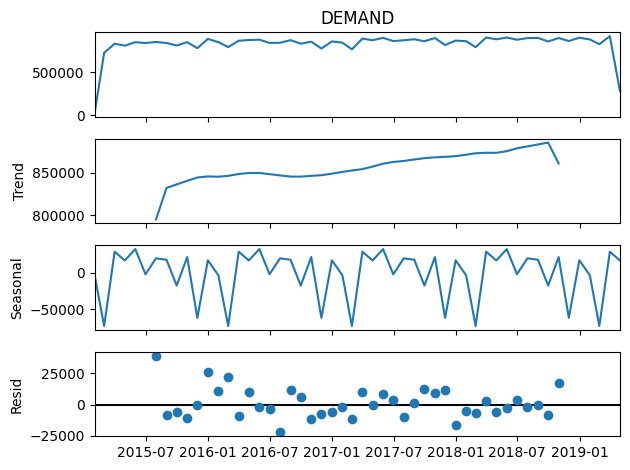

Demand across weekly periods


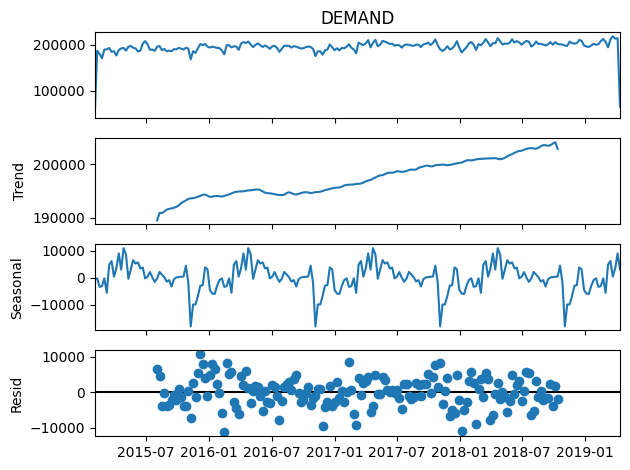

Demand across daily periods


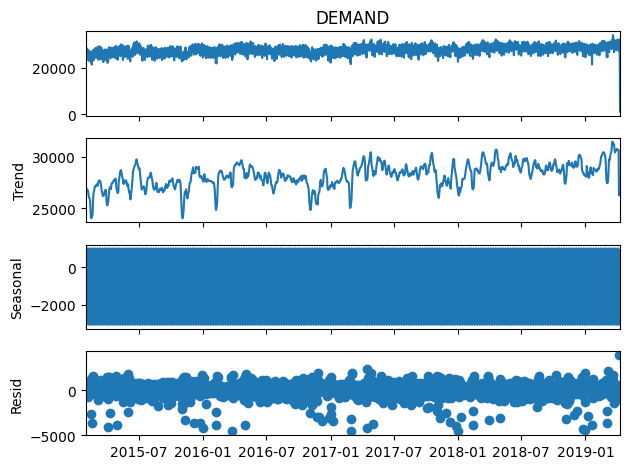

In [ ]:
print("Demand across all the months")
df_seasonal_decompose = seasonal_decompose(monthly_demand_train["DEMAND"],
                                          model='duplicative')
df_seasonal_decompose.plot()
plt.show()

print("Demand across weekly periods")
df_seasonal_decompose = seasonal_decompose(weekly_demand_train["DEMAND"],
                                           model='duplicative')
df_seasonal_decompose.plot()
plt.show()

print("Demand across daily periods")

df_seasonal_decompose = seasonal_decompose(daily_demand_train["DEMAND"],
                                           model='duplicative')
df_seasonal_decompose.plot()
plt.show()



### ADF test

The Augmented Dickey-Fuller helps us check whether a time series has a unit root. The ADF test checks the following hypotheses:

- Null Hypothesis $(H_0)$: The time series has a unit root, meaning it is non-stationary (there is some time-dependent structure, such as a trend).
- Alternative Hypothesis $(H_1)$: The time series is stationary, meaning it does not have a unit root.
If the p-value from the test is small (typically < 0.05), we reject the null hypothesis and conclude that the series is stationary.

Although our time-series show strong seasonality and periodicity, it will come out to be **stationary** (as long as there is no trend). The intuition for this can be seen from the rolling statistics where we see that the mean and standard deviation (although it fluctutes), remains constant.

In [ ]:
adf_test = adfuller(demand_train)

print('ADF Statistic: ', adf_test[0])
print('p-value:' , adf_test[1])

print('Critical Values:')
for key, train_dict in adf_test[4].items():
    print(key, train_dict)
    if adf_test[0] > adf_test[4]["5%"]:
        print("ADF > Critical Values")
        print ("Failed to reject null hypothesis, time series is non-stationary.")
    else:
        print("ADF < Critical Values")
        print ("Reject null hypothesis, time series is stationary.")

ADF Statistic:  -22.38856194817243
p-value: 0.0
Critical Values:
1% -3.4305283505465916
ADF < Critical Values
Reject null hypothesis, time series is stationary.
5% -2.8616188266471667
ADF < Critical Values
Reject null hypothesis, time series is stationary.
10% -2.566811956927193
ADF < Critical Values
Reject null hypothesis, time series is stationary.


### ADF test for all train-test splits

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(ts, window=120):

    adf_test = adfuller(ts)

    print("\n" + "#" * 50)
    print("Augmented Dickey-Fuller Test Results")
    print("#" * 50)

    print(f"ADF Statistic: {adf_test[0]:.6f}")
    print(f"P-value: {adf_test[1]:.6f}")

    print("\nCritical Values:")
    for key, value in adf_test[4].items():
        print(f"  {key}: {value:.6f}")

    print("\nConclusion:")
    if adf_test[0] > adf_test[4]["5%"]:
        print("  ADF Statistic is greater than the 5% critical value.")
        print("  Failed to reject the null hypothesis.")
        print("  The time series is non-stationary.")
    else:
        print("  ADF Statistic is less than the 5% critical value.")
        print("  Reject the null hypothesis.")
        print("  The time series is stationary.")

    print("#" * 50 + "\n")



In [ ]:
# Running ADF tests for all training-test splits
for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]

    demand_train = train[['DEMAND']]
    demand_test = test[["DEMAND"]]

    print(f"\n{'#' * 60}")
    print(f"ADF Test Results for Training-Test Split: {i+1}")
    print(f"{'#' * 60}\n")

    print(f"### Training Data (Split {i+1}) ###")
    adfuller_test(demand_train)

    print(f"### Test Data (Split {i+1}) ###")
    adfuller_test(demand_test)


############################################################
ADF Test Results for Training-Test Split: 1
############################################################

### Training Data (Split 1) ###

##################################################
Augmented Dickey-Fuller Test Results
##################################################
ADF Statistic: -22.388562
P-value: 0.000000

Critical Values:
  1%: -3.430528
  5%: -2.861619
  10%: -2.566812

Conclusion:
  ADF Statistic is less than the 5% critical value.
  Reject the null hypothesis.
  The time series is stationary.
##################################################

### Test Data (Split 1) ###

##################################################
Augmented Dickey-Fuller Test Results
##################################################
ADF Statistic: -1.487443
P-value: 0.539714

Critical Values:
  1%: -3.473830
  5%: -2.880623
  10%: -2.576945

Conclusion:
  ADF Statistic is greater than the 5% critical value.
  Failed to reject the 

## Loss Functions

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

def peak_load_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    peak_load_true = np.max(y_true)
    plape = np.abs((peak_load_true - np.max(y_pred)) / peak_load_true) * 100
    return plape

def value_load_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    peak_min_true = np.min(y_true)
    vlape = np.abs((peak_min_true - np.min(y_pred)) / peak_min_true) * 100
    return vlape

def energy_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    total_energy_true = np.sum(y_true)
    total_energy_pred = np.sum(y_pred)
    eape = np.abs((total_energy_true - total_energy_pred) / total_energy_true) * 100

    return eape

# Autoregression model

We perform differencing to ensure that the underlying time-series is stationary. Our model exhibits strong weekly seasonality. Therefore, a lag of 168 datapoints is an intuitive parameter. However, we do carry out a grid-search to see how it all pans out. The lags we run over are from 50-168 because after that, the trend keeps repeating either way.

Mean Squared Error (MSE): 1776.103787168247


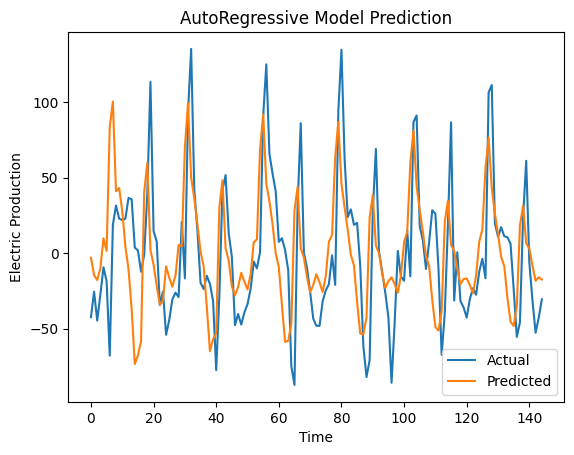

In [ ]:
train['DEMAND_DIFF1'] = train['DEMAND'].diff(1)  # First-order differencing
test['DEMAND_DIFF1'] = test['DEMAND'].diff(1)

train.dropna(inplace=True)
test.dropna(inplace=True)

train_data = train['DEMAND_DIFF1'].values
test_data = test['DEMAND_DIFF1'].values


lag_order = 50
model = AutoReg(train_data, lags=lag_order)
fit_model = model.fit()

########PREDICTING
predictions = fit_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

###Evaluating the model
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error (MSE):', mse)

# Plot the predictions against the actual values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('AutoRegressive Model Prediction')
plt.show()


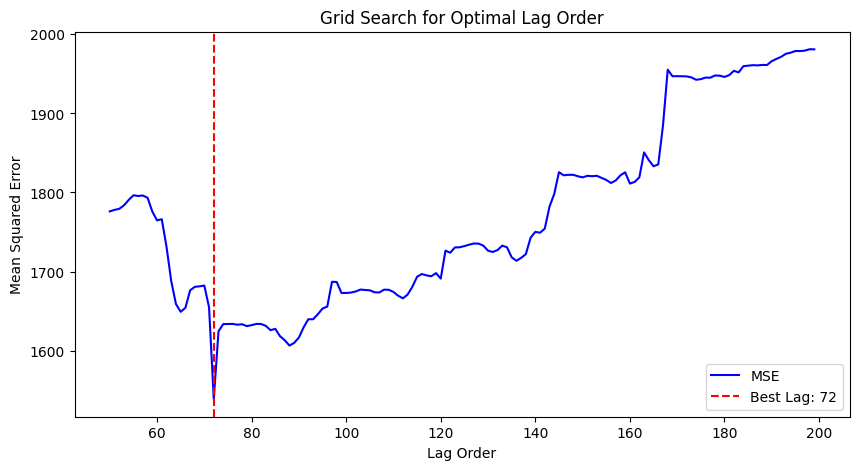

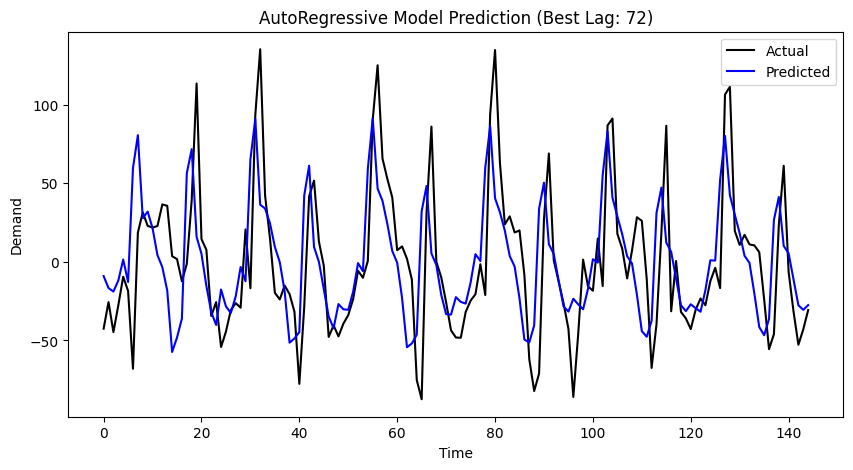

(72, 1538.6202008046146)

In [ ]:
best_mse = float("inf")
best_lag = None
mse_values = []

for lag in range(50, 200):
  model = AutoReg(train_data, lags=lag)
  fit_model = model.fit()
  predictions = fit_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
  mse = mean_squared_error(test_data, predictions)
  mse_values.append((lag, mse))

  if mse < best_mse:
    best_mse = mse
    best_lag = lag

mse_df = pd.DataFrame(mse_values, columns=['Lag', 'MSE'])

# Train the best model
best_model = AutoReg(train_data, lags=best_lag).fit()
best_predictions = best_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

plt.figure(figsize=(10, 5))
plt.plot(mse_df['Lag'], mse_df['MSE'], label='MSE', color='blue')
plt.axvline(x=best_lag, color='red', linestyle='--', label=f'Best Lag: {best_lag}')
plt.xlabel('Lag Order')
plt.ylabel('Mean Squared Error')
plt.title('Grid Search for Optimal Lag Order')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(test_data, label='Actual', color='black')
plt.plot(best_predictions, label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title(f'AutoRegressive Model Prediction (Best Lag: {best_lag})')
plt.show()

# Display best lag and MSE
best_lag, best_mse


### AR for a single train-test split

Let us now use the specified lags present in the dataset:
1. week_X-2
2. week_X-3
3. week_X-4

We are essentially working with AR(3) model:
$$
X_t = c + \phi_1 X_{t -168} + \phi_1 X_{t-336} + \phi_3 X_{t-504} + ϵ
$$


This is essentially a linear regression problem where we are attempting to find the parameters {$\phi_1$,$\phi_2$, $\phi_3$}. We use the OLS method from stats-api model to perform linear regression and then just fit it onto our test data. (**Note: We don't perform differencing**)

Metrics for Original Data:
Mean Squared Error (MSE): 3604.9984428344023
MAPE:  11.03
RMSE: 148.9404982805367
PLAPE: 6.752850892087513
VLAPE: 5.465198575939793
EAPE: 1.6435068912455941


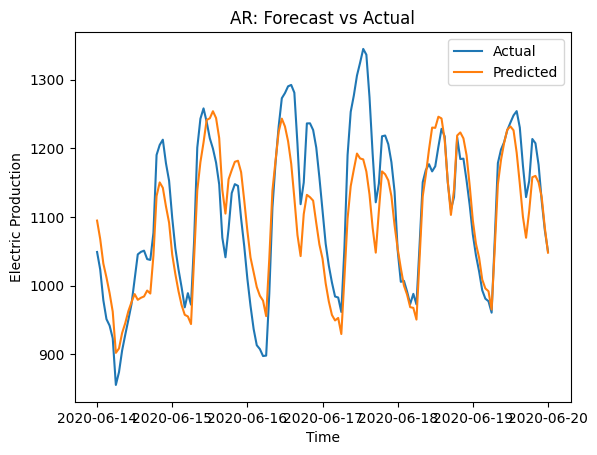

In [ ]:
X_train = train[['week_X-2', 'week_X-3', 'week_X-4']]
y_train = train['DEMAND']

X_train = sm.add_constant(X_train) ##adds the constant term in the regression model as shown in the equation above

model = sm.OLS(y_train, X_train)
result = model.fit()

#print(result.summary())

X_test = test[['week_X-2', 'week_X-3', 'week_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)


#EVALUATING THE MODEL

mse_AR = mean_squared_error(y_test, y_pred)
mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print('Mean Squared Error (MSE):', mse_AR)
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)



# Plotting y_pred vs y_actual


plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('AR: Forecast vs Actual')
plt.show()

### AR across all dataset

In [ ]:
mse_AR = []
mape_AR = []
rmse_AR = []
plape_AR = []
vlape_AR = []
eape_AR = []



for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]

    X_train = train[['week_X-2', 'week_X-3', 'week_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()

    X_test = test[['week_X-2', 'week_X-3', 'week_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)

    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_AR.append(mse_score)
    mape_AR.append(mape_score)
    rmse_AR.append(rmse_score)
    plape_AR.append(plape_score)
    vlape_AR.append(vlape_score)
    eape_AR.append(eape_score)


metrics_df = pd.DataFrame({
    "MSE": mse_AR,
    "MAPE": mape_AR,
    "RMSE": rmse_AR,
    "PLAPE": plape_AR,
    "VLAPE": vlape_AR,
    "EAPE": eape_AR
})

display(metrics_df)

,MSE,MAPE,RMSE,PLAPE,VLAPE,EAPE
0,17380.727161,17.22,263.635281,2.984191,4.314735,1.884403
1,3317.105070,16.37,246.693479,2.513170,5.125711,2.502887
2,11064.838712,16.00,268.914762,9.675427,4.070280,6.993786
3,5316.613176,15.59,229.657422,3.864368,4.296083,1.026945
4,4316.972039,17.29,259.366740,1.807124,12.688957,0.944508
5,3438.370800,17.27,250.064653,1.247690,2.501596,2.173600
6,3430.662901,17.62,244.403087,1.820769,10.640503,3.780599
7,15572.538962,18.75,264.131975,6.982669,2.621847,2.193321
8,19272.955074,17.01,247.998135,3.673968,2.951931,5.111977
9,11612.870093,17.03,246.118269,0.707398,10.070421,4.759166


# Moving Average

Before using MA that is present in the dataset, let us fit a general MA model with different rolling-window paramters (for this one, we use 15)

Mean Squared Error (MSE) using Rolling Average: 2623.2753


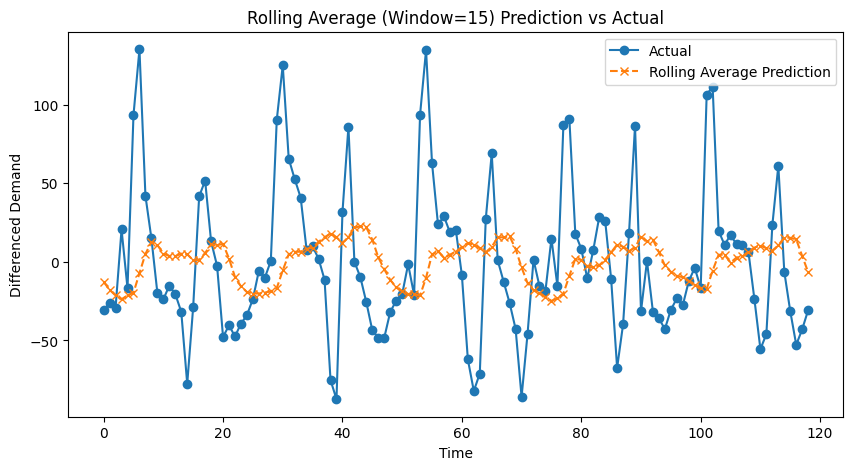

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

train['DEMAND_DIFF1'] = train['DEMAND'].diff(1)
test['DEMAND_DIFF1'] = test['DEMAND'].diff(1)

train.dropna(inplace=True)
test.dropna(inplace=True)

rolling_window = 15

train['Rolling_Avg'] = train['DEMAND_DIFF1'].rolling(window=rolling_window).mean()

test_predictions = []
history = list(train['DEMAND_DIFF1'].values)

for t in range(len(test)):
    if len(history) < rolling_window:
        test_predictions.append(np.mean(history))
    else:
        test_predictions.append(np.mean(history[-rolling_window:]))  # Use last 'rolling_window' points
    history.append(test['DEMAND_DIFF1'].iloc[t])  # Append actual value to maintain rolling update

test_predictions = np.array(test_predictions)

mse = mean_squared_error(test['DEMAND_DIFF1'], test_predictions)
print(f'Mean Squared Error (MSE) using Rolling Average: {mse:.4f}')

plt.figure(figsize=(10, 5))
plt.plot(test['DEMAND_DIFF1'].values, label='Actual', marker='o')
plt.plot(test_predictions, label='Rolling Average Prediction', linestyle='dashed', marker='x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Differenced Demand')
plt.title(f'Rolling Average (Window={rolling_window}) Prediction vs Actual')
plt.show()


### MA for single train-test split

In the dataset, we have the following moving average feature:
1. MA_X-4

We are essentially working with MA(1) model:
$$
X_t = c + \epsilon_t + \theta \epsilon_{t-1}
$$

Where again we need to find $\theta_1$ using linear regression

Mean Squared Error (MSE): 3992.7621213157922
Metrics for Original Data:
MAPE:  10.48
RMSE: 143.8704947318054
PLAPE: 4.98515186851883
VLAPE: 3.7339258670227653
EAPE: 1.5265980653211724


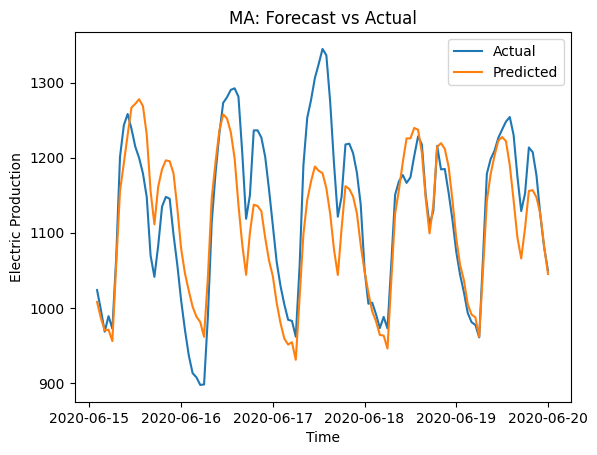

In [ ]:

X_train = train[['MA_X-4']]
y_train = train['DEMAND']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
#print(result.summary())

X_test = test[['MA_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)



# EVALUATING THE MODEL

mse_MA = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse_MA)

mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)

# Plotting y_pred vs y_actual


plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('MA: Forecast vs Actual')
plt.show()

In [ ]:
mse_MA = []
mape_MA = []
rmse_MA = []
plape_MA = []
vlape_MA = []
eape_MA = []

for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]

    X_train = train[['MA_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()

    X_test = test[['MA_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)



    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_MA.append(mse_score)
    mape_MA.append(mape_score)
    rmse_MA.append(rmse_score)
    plape_MA.append(plape_score)
    vlape_MA.append(vlape_score)
    eape_MA.append(eape_score)

metrics_df = pd.DataFrame({
    "MSE": mse_MA,
    "MAPE": mape_MA,
    "RMSE": rmse_MA,
    "PLAPE": plape_MA,
    "VLAPE": vlape_MA,
    "EAPE": eape_MA
})

display(metrics_df)

,MSE,MAPE,RMSE,PLAPE,VLAPE,EAPE
0,17385.439198,17.36,265.892836,3.011788,3.223597,1.797126
1,2163.662499,16.11,243.862108,1.161296,4.129977,1.575273
2,10630.790273,16.01,268.773680,9.462126,3.282712,6.833128
3,5596.028279,15.74,231.862688,3.474348,3.553100,1.127337
4,4038.595247,17.36,260.017351,1.637378,14.196607,0.721248
5,3277.322237,17.36,251.707925,2.092528,1.961534,2.092277
6,3263.862301,17.96,249.633645,2.201292,8.577158,3.892306
7,16080.119673,18.76,263.939779,6.943959,3.033997,2.537345
8,19988.926040,17.31,251.721460,4.510398,4.189335,5.879561
9,10740.239794,16.90,244.461001,0.267798,9.224102,4.473639


# ARMA model

We now have the following features:
1. week_X-2
2. week_X-3
3. week_X-4
4. MA_X-4

The model we are working with is defined is ARMA (3,1) where p = 3 and q = 1:

$$
X_t = c_1 \phi_1 X_{t-1} + c_2 \phi_2 X_{t-2} + c_3 \phi_3 X_{t-3} + \epsilon_t + \theta_1 \epsilon_{t-1}  
$$


### ARMA for a single train-test split

Mean Squared Error (MSE): 4065.163391759455
Metrics for Original Data:
MAPE:  10.55
RMSE: 144.6845539073172
PLAPE: 4.1029983519551605
VLAPE: 3.4028221038046804
EAPE: 1.3083359024851953


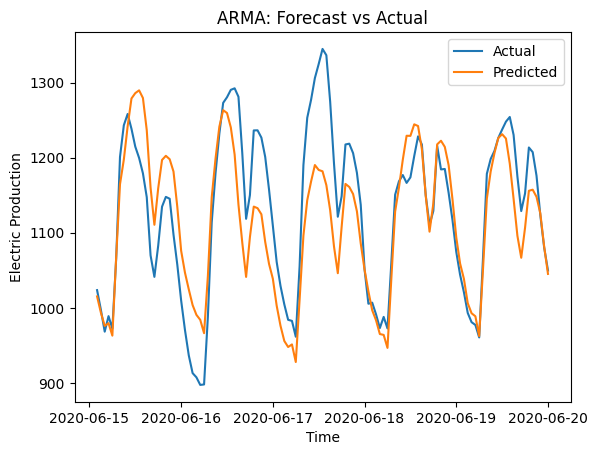

In [ ]:
X_train = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_train = train['DEMAND']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
#print(result.summary())

X_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_test = test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)




# EVALUATING THE MODEL

mse_ARMA = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse_ARMA)


mape_score = mean_absolute_percentage_error(y_test, y_pred)
rmse_score = root_mean_squared_error(y_test, y_pred)
plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
eape_score = energy_absolute_percentage_error(y_test, y_pred)

print("Metrics for Original Data:")
print("MAPE: ", mape_score)
print("RMSE:", rmse_score)
print("PLAPE:", plape_score)
print("VLAPE:", vlape_score)
print("EAPE:", eape_score)


# Plotting y_pred vs y_actual



plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARMA: Forecast vs Actual')
plt.show()

### ARMA for the entire dataset

In [ ]:
mse_ARMA = []
mape_ARMA = []
rmse_ARMA = []
plape_ARMA = []
vlape_ARMA = []
eape_ARMA = []



for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]

    X_train = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_train = train['DEMAND']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()

    X_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_test = test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)


    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARMA.append(mse_score)
    mape_ARMA.append(mape_score)
    rmse_ARMA.append(rmse_score)
    plape_ARMA.append(plape_score)
    vlape_ARMA.append(vlape_score)
    eape_ARMA.append(eape_score)



metrics_df = pd.DataFrame({
    "MSE": mse_ARMA,
    "MAPE": mape_ARMA,
    "RMSE": rmse_ARMA,
    "PLAPE": plape_ARMA,
    "VLAPE": vlape_ARMA,
    "EAPE": eape_ARMA
})

display(metrics_df)

,MSE,MAPE,RMSE,PLAPE,VLAPE,EAPE
0,17733.687338,17.43,266.824126,2.746176,3.085331,1.849611
1,2039.955543,15.96,242.334701,0.156292,3.680748,1.051380
2,10776.170719,15.97,268.164541,9.433634,2.573394,6.822923
3,5584.282545,15.79,232.447166,3.501083,3.337912,1.201089
4,4429.801652,17.32,259.290739,1.684768,14.181281,0.680000
5,3264.326865,17.40,252.314940,2.421454,1.576897,2.069744
6,3139.733792,18.09,251.750088,2.127474,7.356825,3.829578
7,16635.195172,18.80,263.974604,6.335413,3.456078,2.826828
8,20493.100154,17.42,253.106604,5.018428,5.015594,6.181653
9,10356.702519,16.73,242.681815,0.245133,8.650602,4.099674


# ARIMA

We just need to perform differencing. We already saw how this helps remove trend. We will use just first order differencing so d = 1.

### ARIMA for a single train-test split

Metrics for bt Data:
Mean Squared Error (MSE): 939.3363342865676
MAPE:  2.06
RMSE: 30.648594328069397
PLAPE: 3.115785072074262
VLAPE: 1.7383366470135113
EAPE: 0.00804787937860315


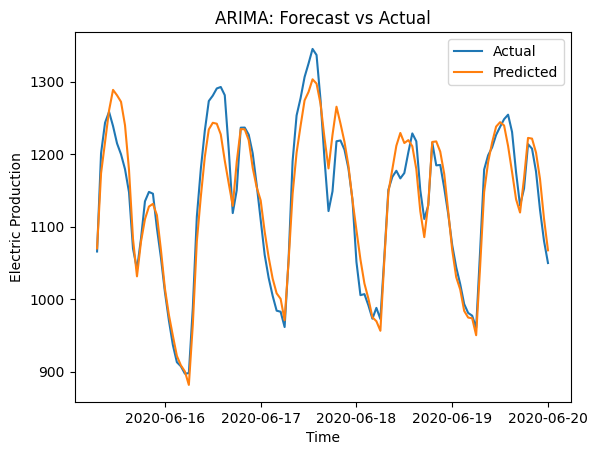

In [ ]:
variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]
moving_avg = variables.rolling(window=120).mean()
demand_ma = variables - moving_avg
demand_ma.dropna(inplace=True)


variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]

moving_avg_test = variables_test.rolling(window=6).mean()
demand_ma_test = variables_test - moving_avg_test
demand_ma_test.dropna(inplace=True)


X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_train = demand_ma['DEMAND']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
#print(result.summary())

X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
y_test = demand_ma_test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)




#Note that we need to backtransform our data and only then should
#we evaluate the results. MAPE cannot be evaluated if we
# have 0 anywhere in our y_pred. Keeping this in mind, we add back
#moving_avg before we evaluate the model.


y_pred_bt = y_pred + moving_avg_test['DEMAND']
y_pred_bt.dropna(inplace=True)

y_test_bt = y_test['DEMAND'] + moving_avg_test['DEMAND']
y_test_bt.dropna(inplace=True)
#print(y_test_bt)

mse_ARIMA_bt = mean_squared_error(y_test_bt, y_pred_bt)
mape_score_bt = mean_absolute_percentage_error(y_test_bt, y_pred_bt)
rmse_score_bt = root_mean_squared_error(y_test_bt, y_pred_bt)
plape_score_bt = peak_load_absolute_percentage_error(y_test_bt, y_pred_bt)
vlape_score_bt = value_load_absolute_percentage_error(y_test_bt, y_pred_bt)
eape_score_bt = energy_absolute_percentage_error(y_test_bt, y_pred_bt)

print("Metrics for bt Data:")
print("Mean Squared Error (MSE):", mse_ARIMA_bt)
print("MAPE: ", mape_score_bt)
print("RMSE:", rmse_score_bt)
print("PLAPE:", plape_score_bt)
print("VLAPE:", vlape_score_bt)
print("EAPE:", eape_score_bt)



plt.plot(y_test_bt, label='Actual')
plt.plot(y_pred_bt, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARIMA: Forecast vs Actual')
plt.show()

In [ ]:
mse_ARIMA = []
mape_ARIMA = []
rmse_ARIMA = []
plape_ARIMA = []
vlape_ARIMA = []
eape_ARIMA = []





for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]
    variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]

    moving_avg = variables.rolling(window=120).mean()
    demand_ma = variables - moving_avg
    demand_ma.dropna(inplace=True)

    variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','DEMAND']]
    moving_avg_test = variables_test.rolling(window=6).mean()
    demand_ma_test = variables_test - moving_avg_test
    demand_ma_test.dropna(inplace=True)


    X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]
    y_train = demand_ma['DEMAND']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()





    X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4']]

    y_test = demand_ma_test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)

    y_pred = y_pred + moving_avg_test['DEMAND']
    y_pred.dropna(inplace=True)

    y_test = y_test['DEMAND'] + moving_avg_test['DEMAND']
    y_test.dropna(inplace=True)

    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARIMA.append(mse_score)
    mape_ARIMA.append(mape_score)
    rmse_ARIMA.append(rmse_score)
    plape_ARIMA.append(plape_score)
    vlape_ARIMA.append(vlape_score)
    eape_ARIMA.append(eape_score)



metrics_df = pd.DataFrame({
    "MSE": mse_ARIMA,
    "MAPE": mape_ARIMA,
    "RMSE": rmse_ARIMA,
    "PLAPE": plape_ARIMA,
    "VLAPE": vlape_ARIMA,
    "EAPE": eape_ARIMA
})

display(metrics_df)

,MSE,MAPE,RMSE,PLAPE,VLAPE,EAPE
0,2291.469295,2.24,47.869294,0.544264,4.149635,0.216584
1,626.820677,1.41,25.036387,1.357490,1.064579,0.007522
2,643.165936,1.39,25.360716,1.868714,0.202440,0.002913
3,744.845135,1.63,27.291851,0.084674,1.558874,0.147007
4,467.844168,1.33,21.629706,2.220754,1.178387,0.209896
5,521.079233,1.31,22.827160,1.271880,0.838398,0.050747
6,530.894520,1.49,23.041148,1.613256,0.968188,0.135271
7,2548.211672,2.98,50.479815,1.790017,1.433415,0.194639
8,2552.267012,2.79,50.519966,1.562285,1.582865,0.122728
9,2166.891334,2.67,46.549880,1.140316,0.487388,0.134511


# ARIMAX


### ARIMAX for single train-test split

Metrics for bt Data:
Mean Squared Error (MSE): 822.5447813109463
MAPE:  1.91
RMSE: 28.680041515153814
PLAPE: 2.6949868547768414
VLAPE: 0.3631862693318428
EAPE: 0.019373162049759043
Metrics for bt Data for a single exogenous:
Mean Squared Error (MSE): 827.724654955935
MAPE:  1.91
RMSE: 28.770204291174835
PLAPE: 2.7843704531278317
VLAPE: 0.7494740592197088
EAPE: 0.0006791101073370159


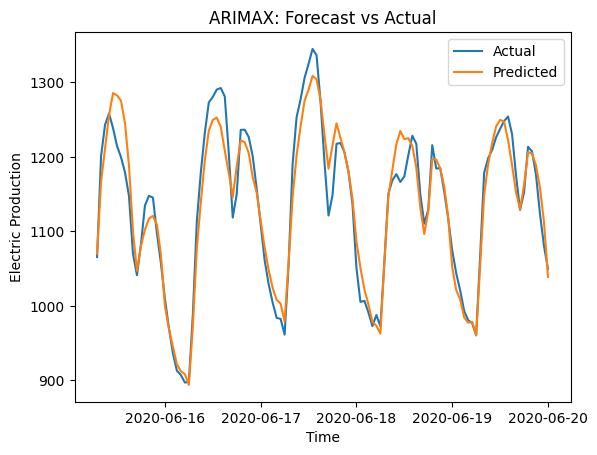

In [ ]:
variables = train
moving_avg = variables.rolling(window=120).mean()
demand_ma = variables - moving_avg
demand_ma = demand_ma.fillna(0)


variables_test = test
moving_avg_test = variables_test.rolling(window=6).mean()
demand_ma_test = variables_test - moving_avg_test
demand_ma_test = demand_ma_test.fillna(0)



X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','dayOfWeek', 'weekend',
                     'holiday', 'Holiday_ID', 'hourOfDay','T2M_toc']]

y_train = demand_ma['DEMAND']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
#print(result.summary())

X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','dayOfWeek', 'weekend',
                     'holiday', 'Holiday_ID', 'hourOfDay','T2M_toc' ]]

y_test = demand_ma_test[["DEMAND"]]
X_test = sm.add_constant(X_test)
y_pred = result.predict(X_test)



# BACKTRANSFORMING

y_pred_bt = y_pred + moving_avg_test['DEMAND']
y_pred_bt.dropna(inplace=True)

y_test_bt = y_test['DEMAND'] + moving_avg_test['DEMAND']
y_test_bt.dropna(inplace=True)




# EVALUATING THE MODEL

mse_ARIMAX_bt = mean_squared_error(y_test_bt, y_pred_bt)
mape_score_bt = mean_absolute_percentage_error(y_test_bt, y_pred_bt)
rmse_score_bt = root_mean_squared_error(y_test_bt, y_pred_bt)
plape_score_bt = peak_load_absolute_percentage_error(y_test_bt, y_pred_bt)
vlape_score_bt = value_load_absolute_percentage_error(y_test_bt, y_pred_bt)
eape_score_bt = energy_absolute_percentage_error(y_test_bt, y_pred_bt)

print("Metrics for bt Data:")
print("Mean Squared Error (MSE):", mse_ARIMAX_bt)
print("MAPE: ", mape_score_bt)
print("RMSE:", rmse_score_bt)
print("PLAPE:", plape_score_bt)
print("VLAPE:", vlape_score_bt)
print("EAPE:", eape_score_bt)


# Analyzing Individual Impact
variables1 = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc', 'DEMAND']]
moving_avg1 = variables1.rolling(window=120).mean()
demand_ma1 = variables1 - moving_avg1
demand_ma1 = demand_ma1.fillna(0)

variables_test1 = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc', 'DEMAND']]
moving_avg_test1 = variables_test1.rolling(window=6).mean()
demand_ma_test1 = variables_test1 - moving_avg_test1
demand_ma_test1 = demand_ma_test1.fillna(0)



X_train1 = demand_ma1[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc']]
y_train1 = demand_ma1['DEMAND']
X_train1 = sm.add_constant(X_train1)
model1 = sm.OLS(y_train1, X_train1)
result1 = model1.fit()

X_test1 = demand_ma_test1[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','holiday','hourOfDay','T2M_toc']]

y_test1 = demand_ma_test1[["DEMAND"]]
X_test1 = sm.add_constant(X_test1)
y_pred1 = result1.predict(X_test1)

y_pred_bt1 = y_pred1 + moving_avg_test1['DEMAND']
y_pred_bt1.dropna(inplace=True)

y_test_bt1 = y_test1['DEMAND'] + moving_avg_test1['DEMAND']
y_test_bt1.dropna(inplace=True)


mse_ARIMAX_bt1 = mean_squared_error(y_test_bt1, y_pred_bt1)
mape_score_bt1 = mean_absolute_percentage_error(y_test_bt1, y_pred_bt1)
rmse_score_bt1 = root_mean_squared_error(y_test_bt1, y_pred_bt1)
plape_score_bt1 = peak_load_absolute_percentage_error(y_test_bt1, y_pred_bt1)
vlape_score_bt1 = value_load_absolute_percentage_error(y_test_bt1, y_pred_bt1)
eape_score_bt1 = energy_absolute_percentage_error(y_test_bt1, y_pred_bt1)

print("Metrics for bt Data for a single exogenous:")
print("Mean Squared Error (MSE):", mse_ARIMAX_bt1)
print("MAPE: ", mape_score_bt1)
print("RMSE:", rmse_score_bt1)
print("PLAPE:", plape_score_bt1)
print("VLAPE:", vlape_score_bt1)
print("EAPE:", eape_score_bt1)


# Plotting y_pred vs y_actual



plt.plot(y_test_bt, label='Actual')
plt.plot(y_pred_bt, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Electric Production')
plt.title('ARIMAX: Forecast vs Actual')
plt.show()

### ARIMAX for entire train-test split

In [ ]:
mse_ARIMAX = []
mape_ARIMAX = []
rmse_ARIMAX = []
plape_ARIMAX = []
vlape_ARIMAX = []
eape_ARIMAX = []


for i in range(len(keys)):
    train = train_dict[keys[i]]
    test = test_dict[keys[i]]

    variables = train[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc', 'DEMAND']]
    moving_avg = variables.rolling(window=120).mean()
    demand_ma = variables - moving_avg
    demand_ma = demand_ma.fillna(0)

    variables_test = test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc', 'DEMAND']]
    moving_avg_test = variables_test.rolling(window=6).mean()
    demand_ma_test = variables_test - moving_avg_test
    demand_ma_test = demand_ma_test.fillna(0)


    X_train = demand_ma[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4','hourOfDay','T2M_toc' ]]
    y_train = demand_ma['DEMAND']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    X_test = demand_ma_test[['week_X-2', 'week_X-3', 'week_X-4','MA_X-4', 'hourOfDay','T2M_toc' ]]
    y_test = demand_ma_test[["DEMAND"]]
    X_test = sm.add_constant(X_test)
    y_pred = result.predict(X_test)

    y_pred = y_pred + moving_avg_test['DEMAND']
    y_pred.dropna(inplace=True)

    y_test = y_test['DEMAND'] + moving_avg_test['DEMAND']
    y_test.dropna(inplace=True)



    mse_score = mean_squared_error(y_test, y_pred)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    rmse_score = root_mean_squared_error(y_test, y_pred)
    plape_score = peak_load_absolute_percentage_error(y_test, y_pred)
    vlape_score = value_load_absolute_percentage_error(y_test, y_pred)
    eape_score = energy_absolute_percentage_error(y_test, y_pred)

    mse_ARIMAX.append(mse_score)
    mape_ARIMAX.append(mape_score)
    rmse_ARIMAX.append(rmse_score)
    plape_ARIMAX.append(plape_score)
    vlape_ARIMAX.append(vlape_score)
    eape_ARIMAX.append(eape_score)



metrics_df = pd.DataFrame({
    "MSE": mse_ARIMAX,
    "MAPE": mape_ARIMAX,
    "RMSE": rmse_ARIMAX,
    "PLAPE": plape_ARIMAX,
    "VLAPE": vlape_ARIMAX,
    "EAPE": eape_ARIMAX
})

display(metrics_df)

,MSE,MAPE,RMSE,PLAPE,VLAPE,EAPE
0,2701.187034,2.59,51.972945,0.212710,3.193248,0.214849
1,584.632604,1.39,24.179177,1.132885,1.795948,0.004876
2,743.387222,1.52,27.265128,1.444270,1.239472,0.001950
3,744.458418,1.63,27.284765,0.487237,1.075381,0.142311
4,439.909250,1.34,20.974014,1.406970,1.617713,0.186828
5,531.103082,1.34,23.045674,1.638045,0.817845,0.034207
6,554.955827,1.50,23.557500,2.073429,1.431732,0.138443
7,2537.038221,2.98,50.369020,1.307415,0.556188,0.183595
8,2644.721825,2.86,51.426859,1.165453,1.085353,0.124452
9,1978.775974,2.59,44.483435,0.640556,1.097331,0.132713


## Evaluation:

ARIMA and ARIMAX consistently outperform AR, MA, and ARMA across all metrics